# Deep Learning Framework

1. How do you install and verify that TensorFlow 2.0 was installed successfully?

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

# To verify that it's version 2.x, you can also check for eager execution
print("Eager execution is enabled:", tf.executing_eagerly())

2.19.0
Eager execution is enabled: True


2.  How can you define a simple function in TensorFlow 2.0 to perform addition?

In [3]:
import tensorflow as tf

@tf.function
def add_tensors(x, y):
  return x + y

# Example usage:
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

result = add_tensors(a, b)
print("Result of addition (tf.constant):", result.numpy())

c = tf.Variable(7)
d = tf.Variable(8)

result_vars = add_tensors(c, d)
print("Result of addition (tf.Variable):", result_vars.numpy())

# You can also pass Python numbers, which TensorFlow will convert to tensors
result_python = add_tensors(10, 20)
print("Result of addition (Python numbers):", result_python.numpy())

Result of addition (tf.constant): [5 7 9]
Result of addition (tf.Variable): 15
Result of addition (Python numbers): 30


3.  How can you create a simple neural network in TensorFlow 2.0 with one hidden layer?

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the sequential model
model = keras.Sequential([
    # Input layer: Specify input_shape for the first layer
    layers.Input(shape=(784,)), # Example: 784 features for a flattened 28x28 image

    # Hidden layer: A Dense layer with, for example, 128 neurons and ReLU activation
    layers.Dense(128, activation='relu', name='hidden_layer_1'),

    # Output layer: A Dense layer with 10 neurons (for 10 classes) and softmax activation
    # for classification problems, or 1 neuron for regression.
    layers.Dense(10, activation='softmax', name='output_layer') # Example for 10-class classification
])

# You can also build the model by stacking layers without Input layer initially,
# but then you must call build with an input_shape or pass input_shape to the first layer
# model = keras.Sequential()
# model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
# model.add(layers.Dense(10, activation='softmax'))

# Display the model summary to see its architecture
model.summary()

# You would typically compile and train the model next
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

4.  How can you visualize the training progress using TensorFlow and Matplotlib?

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


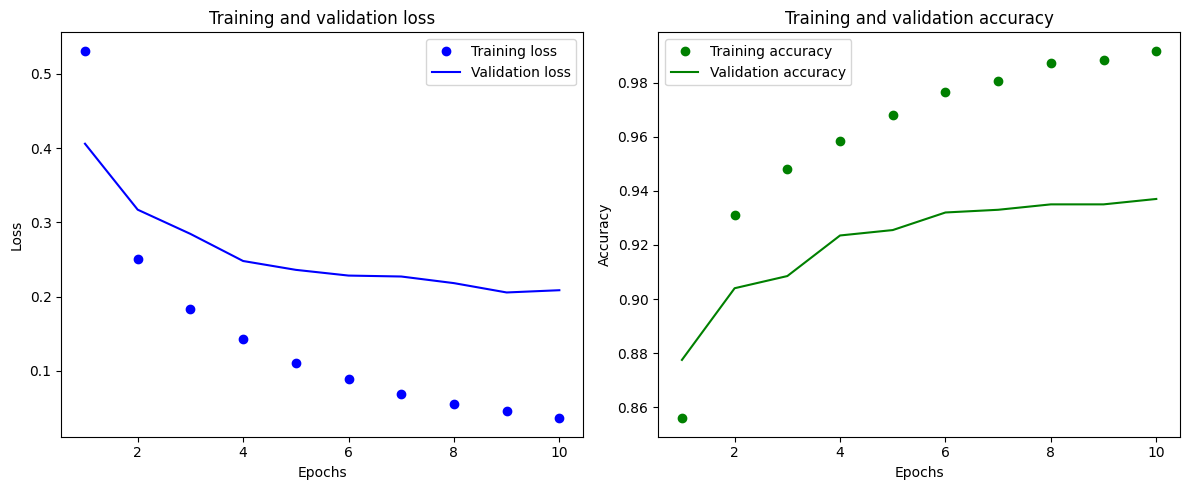

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# 1. Define a simple model (reusing the previous one for demonstration)
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu', name='hidden_layer_1'),
    layers.Dense(10, activation='softmax', name='output_layer')
])

# 2. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Prepare some dummy data for demonstration
# In a real scenario, you would load your dataset (e.g., MNIST)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

# For faster demonstration, use a smaller subset
x_train_subset = x_train[:10000]
y_train_subset = y_train[:10000]
x_test_subset = x_test[:2000]
y_test_subset = y_test[:2000]

# 4. Train the model and store the training history
history = model.fit(x_train_subset, y_train_subset,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test_subset, y_test_subset),
                    verbose=0) # Set verbose to 0 to suppress epoch output

# 5. Visualize the training progress using Matplotlib
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

5. How do you install PyTorch and verify the PyTorch installation?

In [7]:
# 1. Install PyTorch
# The command below installs the CPU version of PyTorch by default.
# For a specific CUDA version (e.g., CUDA 11.8 in Colab), you would typically use:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# For a general installation, this works:
!pip install torch torchvision

# 2. Verify PyTorch Installation
import torch
import torchvision # Added this import statement

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("CUDA is available! GPU count:", torch.cuda.device_count())
    print("Current CUDA device:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. PyTorch will use CPU.")

PyTorch version: 2.8.0+cu126
Torchvision version: 0.23.0+cu126
CUDA is not available. PyTorch will use CPU.


6.  How do you create a simple neural network in PyTorch?

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()                         # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes) # Second fully connected layer (output layer)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Example usage:
# Define hyperparameters
input_size = 784    # For example, flattened 28x28 MNIST images
hidden_size = 128   # Number of neurons in the hidden layer
num_classes = 10    # Number of output classes (e.g., 0-9 for MNIST)

# Instantiate the model
model = SimpleNN(input_size, hidden_size, num_classes)

# Print the model architecture
print(model)

# You can also inspect individual layers
print("\nFirst Linear Layer:", model.fc1)
print("Output Layer:", model.fc2)

# Example of a forward pass with dummy data
dummy_input = torch.randn(1, input_size) # A batch of 1 sample with input_size features
output = model(dummy_input)
print("\nOutput shape from dummy input:", output.shape)
print("First 5 output values:", output[0, :5])

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

First Linear Layer: Linear(in_features=784, out_features=128, bias=True)
Output Layer: Linear(in_features=128, out_features=10, bias=True)

Output shape from dummy input: torch.Size([1, 10])
First 5 output values: tensor([0.3930, 0.0813, 0.2256, 0.1829, 0.1265], grad_fn=<SliceBackward0>)


7. How do you define a loss function and optimizer in PyTorch?

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you have a model defined (e.g., the SimpleNN from the previous step)
# For demonstration, let's re-define SimpleNN or just assume 'model' exists.
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = 784
hidden_size = 128
num_classes = 10
model = SimpleNN(input_size, hidden_size, num_classes)

print("--- Model Defined ---")
print(model)

# 1. Define a Loss Function
# For classification tasks, CrossEntropyLoss is common.
# For regression tasks, MSELoss (Mean Squared Error) is common.
# PyTorch provides many loss functions in torch.nn

criterion = nn.CrossEntropyLoss() # Example for classification with raw logits
print("\n--- Loss Function Defined ---")
print(f"Loss function (criterion): {criterion.__class__.__name__}")

# 2. Define an Optimizer
# The optimizer takes the model's parameters and a learning rate.
# Common optimizers include SGD, Adam, RMSprop.
# PyTorch provides optimizers in torch.optim

optimizer = optim.Adam(model.parameters(), lr=0.001) # Example using Adam optimizer
# You can also use SGD:
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print("\n--- Optimizer Defined ---")
print(f"Optimizer: {optimizer.__class__.__name__}")
print(f"Learning Rate: {optimizer.defaults['lr']}")

# In a typical training loop, you would then:
# 1. Perform a forward pass: outputs = model(inputs)
# 2. Calculate the loss: loss = criterion(outputs, labels)
# 3. Zero the gradients: optimizer.zero_grad()
# 4. Perform a backward pass: loss.backward()
# 5. Update weights: optimizer.step()


--- Model Defined ---
SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

--- Loss Function Defined ---
Loss function (criterion): CrossEntropyLoss

--- Optimizer Defined ---
Optimizer: Adam
Learning Rate: 0.001


8.  How do you implement a custom loss function in PyTorch?

In [10]:
import torch
import torch.nn as nn

# Assuming SimpleNN is already defined from previous steps
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 1. Define a Custom Loss Function by inheriting from nn.Module
class CustomMAELoss(nn.Module):
    def __init__(self):
        super(CustomMAELoss, self).__init__()

    def forward(self, predictions, targets):
        # Calculate Mean Absolute Error
        return torch.mean(torch.abs(predictions - targets))

# Example usage:
input_size = 784
hidden_size = 128
num_classes = 10 # Let's assume a regression task for MAE example, so num_classes could be 1 for simplicity
                # For demonstrating with the previous SimpleNN, we'll keep 10 outputs

model = SimpleNN(input_size, hidden_size, num_classes)

# Instantiate the custom loss function
criterion = CustomMAELoss()
print("\n--- Custom Loss Function Defined ---")
print(f"Custom Loss Function: {criterion.__class__.__name__}")

# Create dummy data for demonstration
batch_size = 4
dummy_input = torch.randn(batch_size, input_size) # Batch of 4 samples
dummy_predictions = model(dummy_input)            # Get predictions from the model

# For MAE, targets should generally be continuous values, not class indices.
# Let's create dummy continuous targets for demonstration purposes.
dummy_targets = torch.randn(batch_size, num_classes)

# Calculate the custom loss
loss = criterion(dummy_predictions, dummy_targets)

print(f"\nPredictions shape: {dummy_predictions.shape}")
print(f"Targets shape: {dummy_targets.shape}")
print(f"Calculated custom MAE Loss: {loss.item():.4f}")


--- Custom Loss Function Defined ---
Custom Loss Function: CustomMAELoss

Predictions shape: torch.Size([4, 10])
Targets shape: torch.Size([4, 10])
Calculated custom MAE Loss: 0.8226


9.  How do you save and load a TensorFlow model?

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# 1. First, let's create a simple model (reusing one from earlier steps)
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu', name='hidden_layer_1'),
    layers.Dense(10, activation='softmax', name='output_layer')
])

# Compile the model (required for training, not strictly for saving, but good practice)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model created and compiled.")

# --- Saving a TensorFlow Model ---

# Option 1: Save in native Keras format (.keras) - Recommended for Keras models
# This saves the entire model: architecture, weights, and training configuration (optimizer state).
keras_native_path = './my_keras_model.keras'
model.save(keras_native_path)
print(f"\nModel saved to: {keras_native_path} (Native Keras format)")

# Option 2: Save in HDF5 format (.h5) - Legacy Keras format
# This also saves the architecture, weights, and training configuration.
# It's a single H5 file.
h5_model_path = './my_model.h5'
model.save(h5_model_path)
print(f"Model saved to: {h5_model_path} (HDF5 format)")

# Option 3: Export as TensorFlow SavedModel format (directory) - for deployment
# This creates a directory containing the model's assets.
saved_model_dir_path = './my_saved_model_dir'
model.export(saved_model_dir_path) # Use model.export() for SavedModel format
print(f"Model exported to: {saved_model_dir_path} (TensorFlow SavedModel format)")

# Option 4: Save only the model's weights
# This saves only the learned weights of the model, not its architecture or optimizer state.
# You need to re-create the model architecture before loading weights.
weights_path = './my_model_weights.weights.h5' # Often weights are saved with .weights.h5 extension
model.save_weights(weights_path)
print(f"Model weights saved to: {weights_path}")


# --- Loading a TensorFlow Model ---

# Loading from Native Keras format (.keras)
print("\nLoading model from Native Keras format...")
loaded_model_keras_native = tf.keras.models.load_model(keras_native_path)
loaded_model_keras_native.summary()
print("Model loaded successfully from Native Keras format.")

# Loading from HDF5 format
print("\nLoading model from HDF5 format...")
loaded_model_h5 = tf.keras.models.load_model(h5_model_path)
loaded_model_h5.summary()
print("Model loaded successfully from HDF5 format.")

# Loading from TensorFlow SavedModel format (directory) in Keras 3
print("\nLoading model from TensorFlow SavedModel format (using TFSMLayer for Keras 3)...")
# For Keras 3, SavedModel is loaded as an inference-only layer
loaded_tfsmlayer = keras.layers.TFSMLayer(saved_model_dir_path, call_endpoint='serving_default')
# To get a full model object, you might wrap it in a Sequential model or Functional API model
loaded_model_savedmodel_keras3 = keras.Sequential([
    keras.Input(shape=(784,)), # Define the input shape explicitly
    loaded_tfsmlayer
])
loaded_model_savedmodel_keras3.summary()
print("Model loaded successfully from TensorFlow SavedModel format (using TFSMLayer).")

# Loading only weights (requires re-creating the model structure first)
print("\nLoading model weights...")
# Create a fresh, identical model instance
new_model_for_weights = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu', name='hidden_layer_1'),
    layers.Dense(10, activation='softmax', name='output_layer')
])
# Load the weights into the new model
new_model_for_weights.load_weights(weights_path)
new_model_for_weights.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
new_model_for_weights.summary()
print("Model weights loaded into a new model instance.")

Model created and compiled.

Model saved to: ./my_keras_model.keras (Native Keras format)
Model saved to: ./my_model.h5 (HDF5 format)
Saved artifact at './my_saved_model_dir'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 784), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133009550423248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133014335282960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133009547101392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133009547100624: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model exported to: ./my_saved_model_dir (TensorFlow SavedModel format)
Model weights saved to: ./my_model_weights.weights.h5

Loading model from Native Keras format...


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

Model loaded successfully from Native Keras format.

Loading model from HDF5 format...


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model loaded successfully from HDF5 format.

Loading model from TensorFlow SavedModel format (using TFSMLayer for Keras 3)...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tfsm_layer (TFSMLayer)          │ (None, 10)             │       101,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model loaded successfully from TensorFlow SavedModel format (using TFSMLayer).

Loading model weights...


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model weights loaded into a new model instance.
